<font size="6"><b>Garrett Lubin<b/><font/>

<font size="4"><b>Final Project 3022<b/><font/>

In [38]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
from matplotlib.gridspec import GridSpec
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

For my project in CS3022 I decided to explore police shooting in African American communities. We can start with an initial hypothesis that states African Americans would be the primary victims of police killings despite being a minority population. Using two different datasets ranging between the years 2015 - 2020 I was able to achieve some interesting results.


<font size="4"><b>Cleaning:<b/><font/>

In [39]:
df = pd.read_csv('data.csv')

Starting with the main dataset containing a wholesome view of fatal shooting between years 2015-2020, I was able produce 14 columns, 2 of which are unneccesary due to the explict nature of ethics. In other words, we drop ID abd Names. In the bellow cell I introduce what data we have about the person being shot, the location of shooting, and the shooting action itself. The next step is to check missing values and handle them.

In [40]:
df.columns
df.isna().sum()

id                           0
name                       206
date                         0
manner_of_death              0
armed                      212
age                        251
gender                       1
race                       545
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       317
body_camera                  0
longitude                  287
latitude                   287
is_geocoding_exact           0
dtype: int64

Using the missingno library we can determine what values in our data are missing. Here we have armed, age, gender, race, flee, longitude, and latitude. 

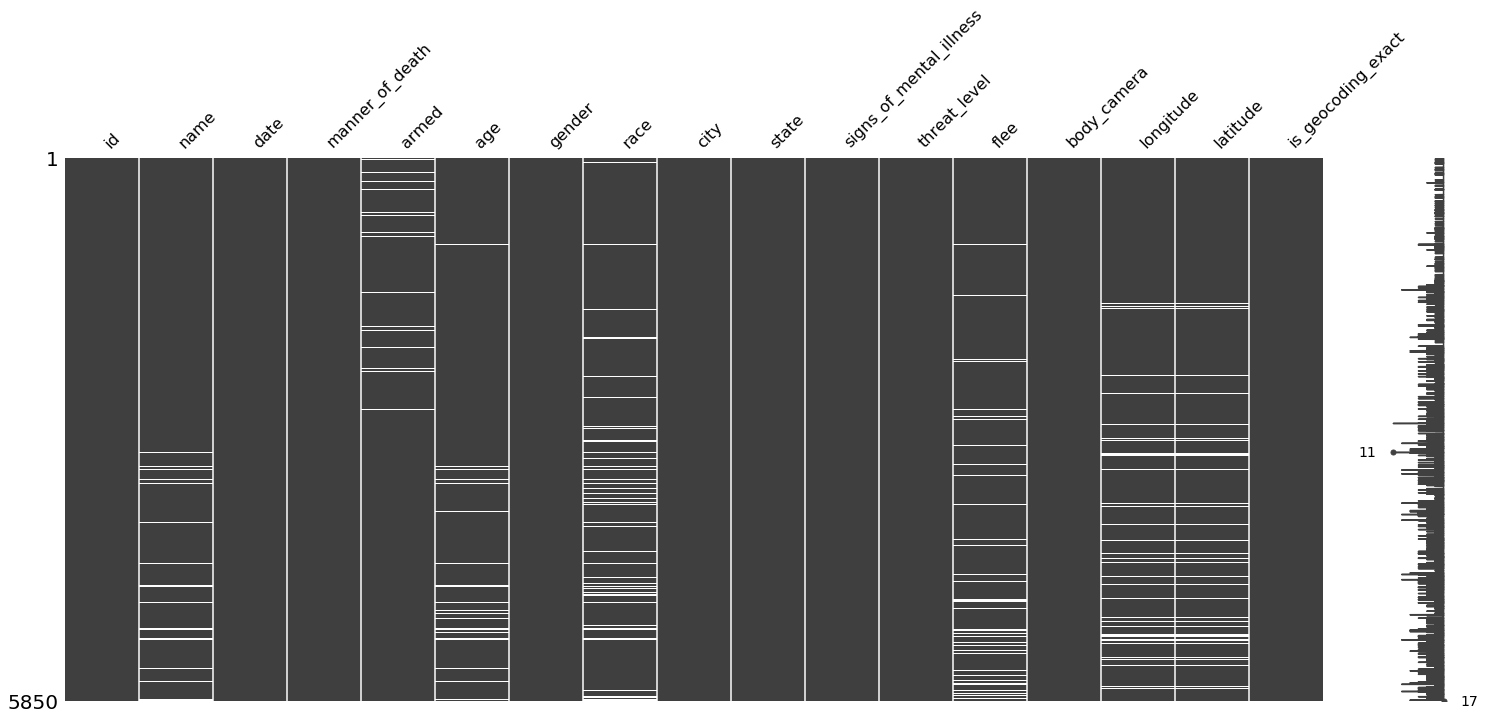

In [41]:
msno.matrix(df)

Using our matrix, we can determine that values on gender and race overlap. 

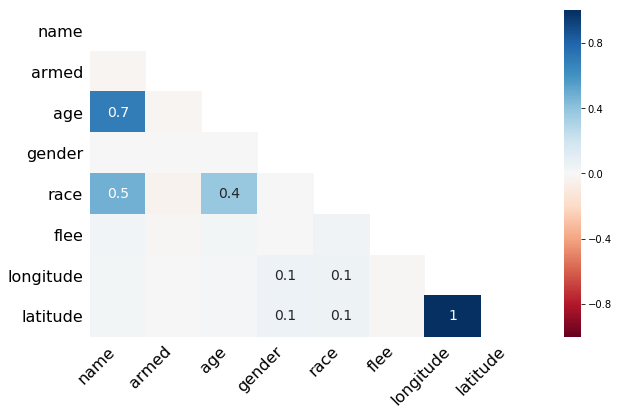

In [42]:
msno.heatmap(df, figsize=(10,6))

Looking at our data in wepon used, I will begin by dropping the rows that contain missing values in race, age, and gender columns because they describe the person being shot and could result in misleading assumptions about cause of death. Using the dataframe bellow, we can see the diversity of data and understand how our data began in its condition. Further, we can see not fleeing overshadows our fleeing count so we can fill the missing values there as well. 

In [43]:
df.armed.value_counts()

gun                                 3342
knife                                858
unarmed                              373
toy weapon                           194
undetermined                         173
vehicle                              170
unknown weapon                        88
machete                               48
Taser                                 27
ax                                    24
sword                                 23
baseball bat                          19
gun and knife                         19
hammer                                16
metal pipe                            14
screwdriver                           13
box cutter                            12
sharp object                          12
gun and vehicle                       12
gun and car                           11
hatchet                               11
crossbow                               9
BB gun                                 7
shovel                                 7
scissors        

In [44]:
df.flee.value_counts()

Not fleeing    3627
Car             960
Foot            753
Other           193
Name: flee, dtype: int64

In [45]:
df.flee.fillna('Not fleeing', inplace=True)
df.armed.fillna(df.armed.value_counts().index[0], inplace=True)
df.dropna(axis=0, how='any', inplace=True)

<font size="4"><b>Exploratory Data Analysis:<b/><font/>

In my first visualiztion I begin with a time series chart showing police shootings from 2015 to 2020. Although it does not give information regarding out hypothesis that African Americans would be the primary victims of police killings despite being a minority population, it does give us some insight on where our biggest activity occured regarding the anomly. This visualization could be found useful in tracking major disturbances in the black communities in the recent past years.

In [46]:

df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

df_date = df[['date','armed']].groupby('date').count().sort_values(by='date')
df_date.rename(columns={'armed':'count'}, inplace=True)

Text(0.5, 1.0, 'Fatal Shootings - 10 day average')

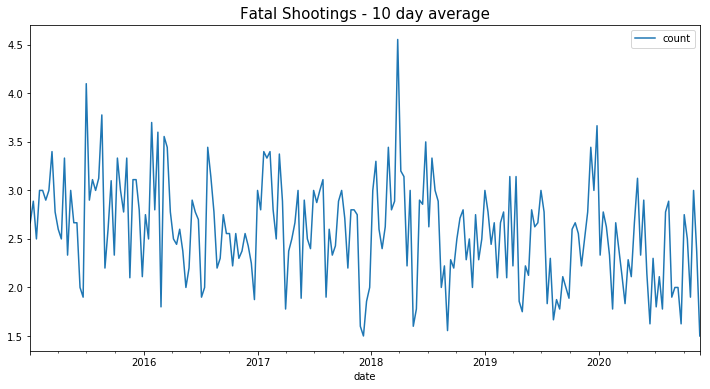

In [47]:
df_date.resample('10D').mean().plot(figsize=(12,6))
plt.title('Fatal Shootings - 10 day average', fontsize=15)

Bellow we have a histogram of police killing victims by age with US 2015 median age in black and median victim age in red.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



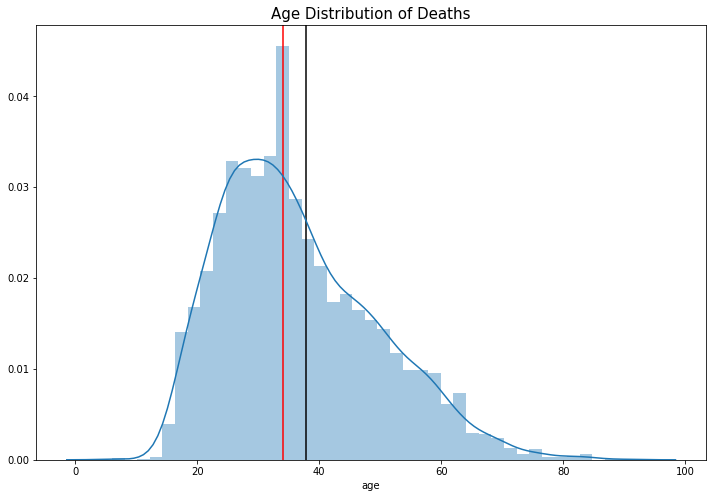

In [48]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Deaths', fontsize=15)
plt.axvline(37.8, 0, 3.5, color = 'black');
plt.axvline(df["age"].median(skipna=True), 0, 3.5, color = 'r');
sns.distplot(df.age)

Further, we can see using the above histogram that our dataset shows that the median age of deaths by blacks is bellow the national US average. Similar to the above visualization, this is not exactly in line with our hypothesis however it does give us some insight to the national crisis such in respect to the lose of human life at a young age. 

In [49]:

df_race = df[['race','year','armed']].groupby(['race','year']).count().reset_index()
df_race.rename(columns={'armed':'number_of_deaths'}, inplace=True)

In [50]:
df_pop = pd.DataFrame({'race':['W','B','A','H','N','O'],
'population':[0.601, 0.134, 0.059, 0.185, 0.013, 0.008]})
df_pop['population'] = df_pop['population']*328

In [51]:
df_race = pd.merge(df_race, df_pop, on='race')
df_race['deaths_per_million'] = df_race['number_of_deaths'] / df_race['population']
df_race.head()

,race,year,number_of_deaths,population,deaths_per_million
0,A,2015,13,19.352,0.671765
1,A,2016,14,19.352,0.723439
2,A,2017,14,19.352,0.723439
3,A,2018,18,19.352,0.930136
4,A,2019,18,19.352,0.930136


In the below visualization we can see where our data confirms the hypothesis. In every year between 2015 to 2020, blacks where targeted the most despite being a minority population. Futher we can show that it is specifially black men which are targeted the most. This is deeply concerning. 

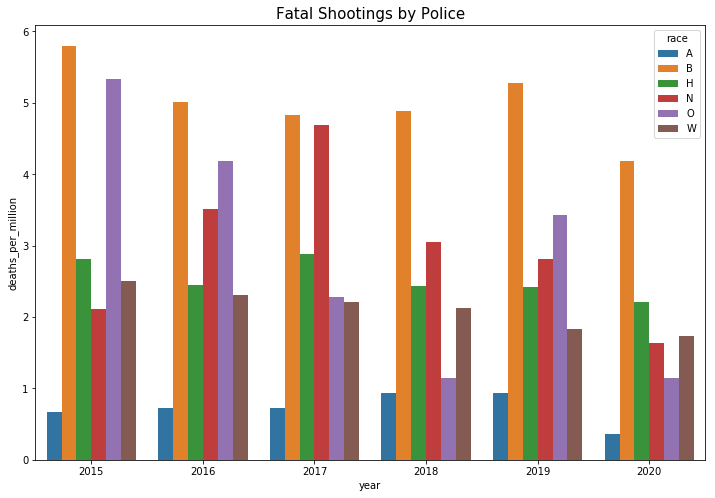

In [52]:
plt.figure(figsize=(12,8))
plt.title("Fatal Shootings by Police", fontsize=15)
sns.barplot(x='year', y='deaths_per_million', hue='race', data=df_race )

In [53]:
data = pd.read_csv('data1.csv', index_col=0)

race = [1, 2, 3, 4, 5] # black, white, hispanic, asian, native
race_map = {'Black': 1, 'White': 2, 'Hispanic/Latino': 3, 
            'Asian/Pacific Islander': 4, 'Native American': 5}
data['raceethnicity'] = data['raceethnicity'].map(race_map);


month = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
         'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data['month'] = data['month'].map(month)


gender = {'Male': 1, 'Female': 2}
data['gender'] = data['gender'].map(gender)


state = {'AK': 50,'AL': 12,'AR': 14,'AZ': 44,'CA': 46,'CO': 39,'CT': 21,'DC': 9,'DE': 6,'FL': 1,
    'GA': 2,'HI': 49,'IA': 32,'ID': 42,'IL': 29,'IN': 27,'KS': 34,'KY': 10,'LA': 15,'MA': 22,
    'MD': 7,'ME': 25,'MI': 28,'MN': 31,'MO': 33,'MS': 13,'MT': 41,'NC': 4,'ND': 37,'NE': 35,
    'NH': 23,'NJ': 18,'NM': 38,'NV': 45,'NY': 20,'OH': 26,'OK': 16,'OR': 47,'PA': 19,'RI': 25,
    'SC': 3,'SD': 36,'TN': 11,'TX': 17,'UT': 43,'VA': 5,'VT': 24,'WA': 48,'WI': 30,'WV': 8,
    'WY': 40,
}

state_pop = [20271272,10214860,4896146,10042802,8382993,945,934,6006401,1844128,672228,4425092,\
             6600299,4858979,2992333,2978204,4670724,3911338,27469114,8958013,12802503,19795791, \
            6590886,6794422,1330608,626042,1329328,11613423,6619680,9922576,12859995,5771337, \
            5489594,3123899,6083672,2911641,1896190,858469,756927,2085109,5456574,586107,\
             1032949,1654930,2995919,6828065,2890845,39144818,4028977,7170351,1431603,738432]
data['state'] = data['state'].map(state)

cause = {'Gunshot': 1, 'Death in custody': 2, 'Taser': 3, 'Struck by vehicle': 4}
data['cause'] = data['cause'].map(cause)


armed = {'No': 0, 'Firearm': 1, 'Non-lethal firearm': 2, 'Knife': 3, 'Vehicle': 4, 'Other': 5}
data['armed'] = data['armed'].map(armed)


Bellow we will explore futher interesting findings regarding our hypothesis of African Americans being the primary victims of police killings despite being a minority population. Here we will explore our worst and base case cenarios starting with the national average. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



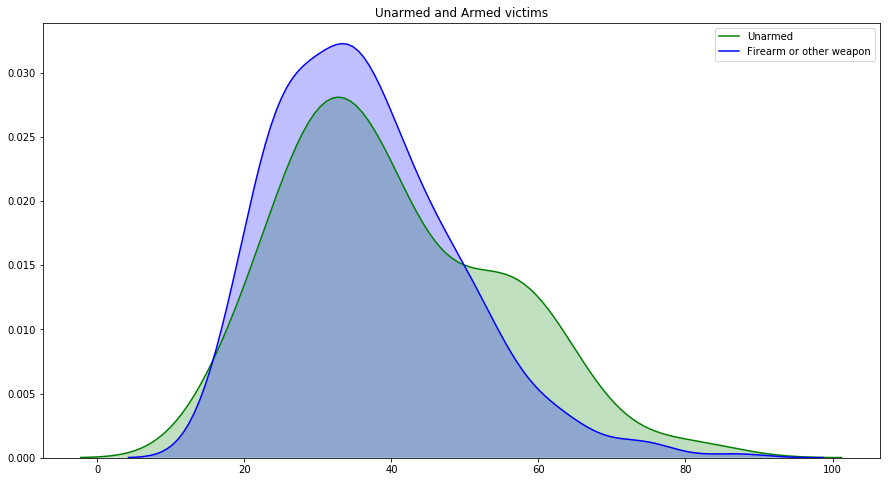

In [54]:
plt.figure(figsize=(15,8))
sns.kdeplot(data["age"][data.armed == 0], color="green", shade=True)
sns.kdeplot(data["age"][data.armed != 0], color="blue", shade=True)
plt.legend(['Unarmed', 'Firearm or other weapon'])
plt.title('Unarmed and Armed victims')
plt.show();

In [55]:
race_data = data.groupby(['raceethnicity'])
black_data = race_data.get_group(1)
asian_data = race_data.get_group(4)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



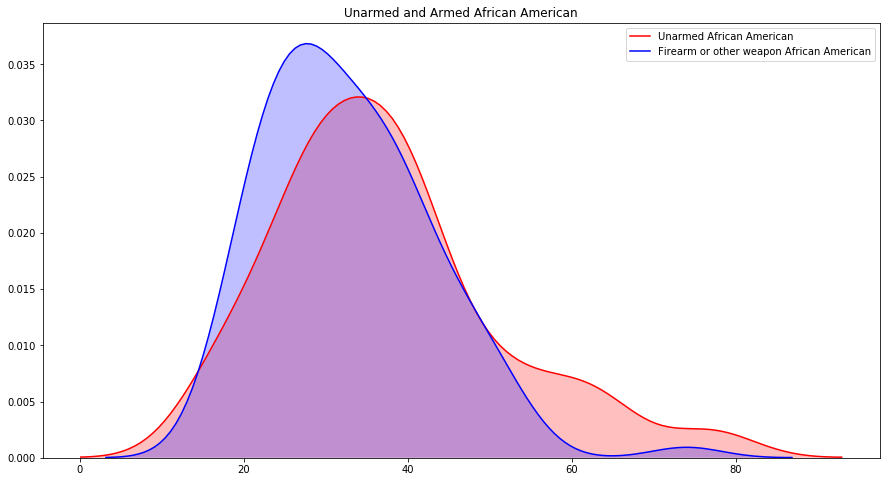

In [56]:
plt.figure(figsize=(15,8))
sns.kdeplot(black_data["age"][black_data.armed == 0], color="red", shade=True)
sns.kdeplot(black_data["age"][black_data.armed != 0], color="blue", shade=True)
plt.legend(['Unarmed African American', 'Firearm or other weapon African American'])
plt.title('Unarmed and Armed African American')
plt.show();

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



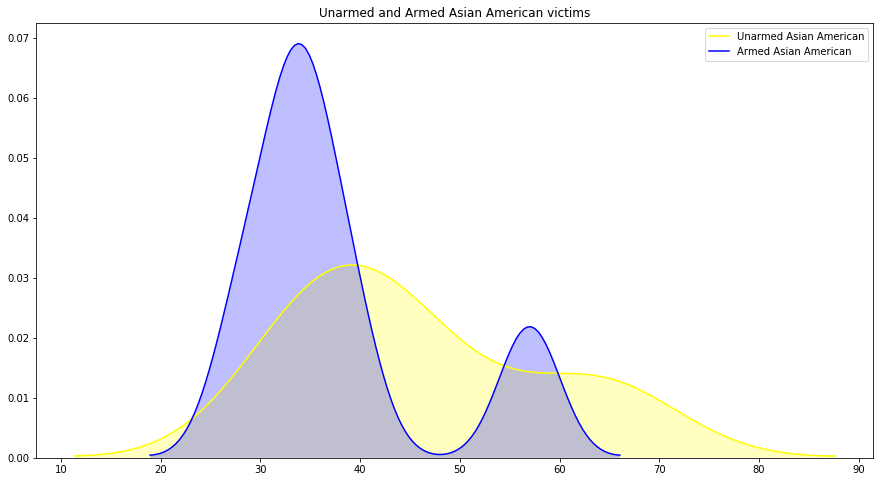

In [57]:
plt.figure(figsize=(15,8))
sns.kdeplot(asian_data["age"][asian_data.armed == 0], color="yellow", shade=True)
sns.kdeplot(asian_data["age"][asian_data.armed != 0], color="blue", shade=True)
plt.legend(['Unarmed Asian American', 'Armed Asian American'])
plt.title('Unarmed and Armed Asian American victims')
plt.show();

Bellow I've implemented a function for a correlation matrix. What we can see is a high density in areas of mental illness and age. This is also deeply concerning when trying unpack why these fatal shootings occur. 

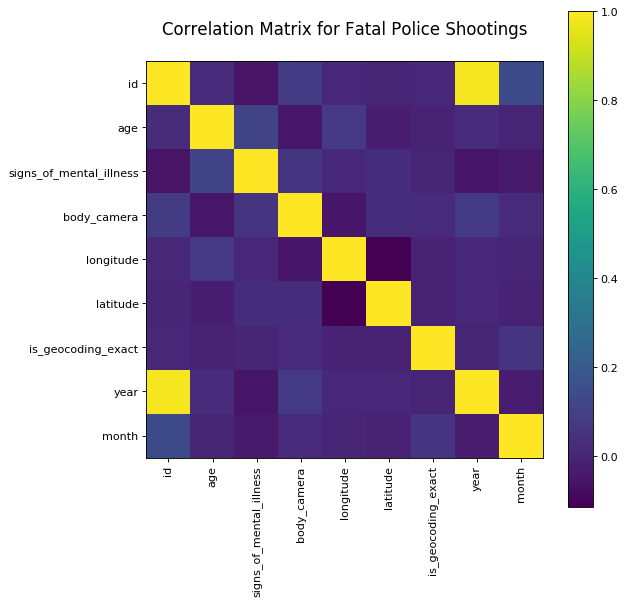

In [58]:

def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Fatal Police Shootings', fontsize=15)
    plt.show()
plotCorrelationMatrix(df, 8)

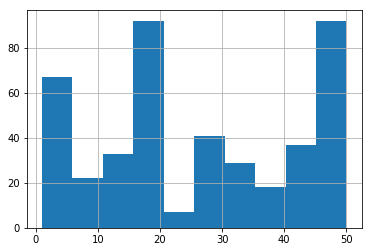

In [59]:
data['state'].hist();

I ran a histogram of the states organized by geographic location. The results show that southern states have a lower death rate, and western states have higher death rates. These interesting results led to futher investigation.

In [60]:
df1 = pd.read_csv('data.csv')
us_census_data = pd.read_csv('acs2017_county_data.csv')


In [61]:
state_counts = df1.groupby(by='state').agg({'id' : 'count'}).reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['state'],
    z = state_counts['id'],
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Deaths"
))

fig.update_layout(
    title_text = 'Police Shooting Deaths by US States',
    geo_scope='usa'
)

fig.show()

We can see that our hypothesis held up to some extent however the results are understandable when considering the populations found in California, Texas, and Florida. For our next visualization we'll factor in the US Poulation per 100,000 persons to get an idea of how police fatalites looks for each region.

In [62]:
state_pops = pd.read_csv('State Populations.csv')
state_codes = {'California' : 'CA', 'Texas' : 'TX', 'Florida' : 'FL', 'New York' : 'NY', 'Pennsylvania' : 'PA',
       'Illinois' : 'IL', 'Ohio' : 'OH', 'Georgia' : 'GA', 'North Carolina' : 'NC', 'Michigan' : 'MI',
       'New Jersey' : 'NJ', 'Virginia' : 'VA', 'Washington' : 'WA', 'Arizona' : 'AZ', 'Massachusetts' : 'MA',
       'Tennessee' : 'TN', 'Indiana' : 'IN', 'Missouri' : 'MO', 'Maryland' : 'MD', 'Wisconsin' : 'WI',
       'Colorado' : 'CO', 'Minnesota' : 'MN', 'South Carolina' : 'SC', 'Alabama' : 'AL', 'Louisiana' : 'LA',
       'Kentucky' : 'KY', 'Oregon' : 'OR', 'Oklahoma' : 'OK', 'Connecticut' : 'CT', 'Iowa' : 'IA', 'Utah' : 'UT',
       'Nevada' : 'NV', 'Arkansas' : 'AR', 'Mississippi' : 'MS', 'Kansas' : 'KS', 'New Mexico' : 'NM',
       'Nebraska' : 'NE', 'West Virginia' : 'WV', 'Idaho' : 'ID', 'Hawaii' : 'HI', 'New Hampshire' : 'NH',
       'Maine' : 'ME', 'Montana' : 'MT', 'Rhode Island' : 'RI', 'Delaware' : 'DE', 'South Dakota' : 'SD',
       'North Dakota' : 'ND', 'Alaska' : 'AK', 'District of Columbia' : 'DC', 'Vermont' : 'VT',
       'Wyoming' : 'WY'}
state_pops['State Codes'] = state_pops['State'].apply(lambda x: state_codes[x])
state_counts['Pop'] = state_counts['state'].apply(lambda x: state_pops[state_pops['State Codes'] == x].reset_index()['2018 Population'][0])

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['state'],
    z = state_counts['id'] / state_counts['Pop'] * 100000,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Deaths Per 100,000"
))

fig.update_layout(
    title_text = 'Police Shooting Deaths by US States per 100,000 People',
    geo_scope='usa'
)

fig.show()

<font size="4"><b>Conclusion:<b/><font/>

Police brutality has become a household name in American culture. As a result I decided to investigate this topic thoroughly. Using the inital hypothesis that African Americans were most likely to be the victim of police shootings I was able to derive a secondary hypothesis that police shootings were more likely to happen in south. Although the conditon of the datasets were fairly complete, there were many instances where I had to remove and replace data points.

Noticing inconsitencies in the data I decided to use data from the US Census to cross validate finding in my hypothesis. The final results were consistent. Using kernal density plots I decided to show the worst and base case cenarios in unarmed versus armed fatal shootings within the domain of demographics. The results were disturbing but worth the implementation. Further, I decided to implement a Correlation Matrix which showed areas of concern as far death in mental health and age.

The geographic analysis was particularly interesting as I did not predict western states to have higher incidence rates than southern states. Regardless I found a Choropleth Map useful.
If I were to investigate this dataset further, I would want to pull data from poverty stricken areas and coorelate that of high school gradution and see if results would yield as higher rate of death from police shootings.


<font size="4"><b>Models:<b/><font/>

For the model section of the project, I've decided to go the route of decision tree modeling. Using this model I can show that we can predict the ethnicity of the persons being killed by police.

For prediction I used 500 samples from the data for training. Using multi class modeling, I was able to get 0.6 accuracy in predicting the ethnicity of killing. The models used are Logistic Regression Modeling and K Nearest Neighbor.

<font size="4"><b>Multi Class Modeling:<b/><font/>

In [ ]:
strings = ['name', 'streetaddress', 'city', 'namelsad', 'lawenforcementagency']

In [ ]:
data.drop(strings, axis=1, inplace=True)
data.dropna(inplace=True)

In [ ]:
X = data.drop('raceethnicity', axis=1)

In [ ]:
y = data['raceethnicity']

<font size="4"><b>Logistic Regression Model:<b/><font/>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

Because the split of the data is random, we want to ensure that the results are reproducible. By specifying the random seed we will ensure that we get the same random numbers each time we run the code.

In [ ]:
results = []
seed = 7
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    ltree_model = LogisticRegression().fit(X_train, y_train) 
    y_pred = ltree_model.predict(X_test)
    accuracy = ltree_model.score(X_test, y_test)
    results.append(accuracy)


In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print()
print(classification_report(y_test, y_pred))
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

<font size="4"><b>K Nearest Neighbor<b/><font/>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_results = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    k_results.append(accuracy)

In [ ]:
k_predictions = knn.predict(X_test)  
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print()
print(classification_report(y_test, y_pred))
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

<font size="4"><b>Neural Network<b/><font/>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,)),
    keras.layers.Dense(10, activation=tf.nn.relu6),
    keras.layers.Dense(20, activation=tf.nn.relu6),
    keras.layers.Dense(15, activation=tf.nn.relu6),
    keras.layers.Dense(6, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)